# Compare fingerprints from AR5, AR6 (Aimée Slangen) and from Thomas Frederikse

In [61]:
root = '/Users/dewilebars/Projects/'
budget_dir = f'{root}/SLBudget/'
slproj_dir = f'{root}/Project_ProbSLR/SLProj/'

import sys
sys.path.append(f'{budget_dir}code')
sys.path.append(f'{slproj_dir}code')

import matplotlib.pyplot as plt
import xarray as xr

import SeaLevelContrib as slc
import func_misc as misc

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [39]:
finger_dir = f'{root}/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/'

In [40]:
LOC_FP = [53, 5] # lat, lon

f_gic = xr.open_dataset(finger_dir+'Relative_GLACIERS_reg.nc', \
                             decode_times=False)
F_gic = misc.finger1D(LOC_FP[0], LOC_FP[1], f_gic.latitude, f_gic.longitude, 
                      f_gic.RSL)[-1].values.item()/100

f_ic        = xr.open_dataset(finger_dir+'Relative_icesheets_reg.nc')
lat_ic      = f_ic.latitude #tofloat?
lon_ic      = f_ic.longitude
F_gsmb      = misc.finger1D(LOC_FP[0], LOC_FP[1], lat_ic, lon_ic, f_ic.SMB_GRE).values.item()/100
F_asmb      = misc.finger1D(LOC_FP[0], LOC_FP[1], lat_ic, lon_ic, f_ic.SMB_ANT).values.item()/100
F_gdyn      = misc.finger1D(LOC_FP[0], LOC_FP[1], lat_ic, lon_ic, f_ic.DYN_GRE).values.item()/100
F_adyn      = misc.finger1D(LOC_FP[0], LOC_FP[1], lat_ic, lon_ic, f_ic.DYN_ANT).values.item()/100

f_gw       = xr.open_dataset(finger_dir+'Relative_GROUNDWATER_reg.nc', \
                             decode_times=False)
F_gw       = misc.finger1D(LOC_FP[0], LOC_FP[1], f_gw.latitude, f_gw.longitude, f_gw.GROUND)[-1].values.item()/100

In [41]:
fingerprints = [F_gic, F_gsmb, F_asmb, F_gdyn, F_adyn, F_gw]
fingerprints

[0.7480514526367188,
 0.20718278884887695,
 1.0741610717773438,
 0.2208646011352539,
 1.1093885803222656,
 0.7055201721191406]

In [42]:
#slc.contrib_frederikse2020([20], 'glac')['Glaciers']/slc.contrib_frederikse2020_glob('Glaciers')['Glaciers [mean]']
slc.contrib_frederikse2020([20], 'glac')['Glaciers']/slc.contrib_frederikse2020_glob('Glaciers')['Glaciers [mean]']

IndexError: list index out of range

It seems very similar.

## Read fingerprints from AR6

In [43]:
finger_ar6_dir = f'{root}/Project_ProbSLR/Data_Proj/Data_AR6/grd_fingerprints_data/FPRINT/'

In [44]:
f_ar6_wais = xr.open_dataset(f'{finger_ar6_dir}fprint_wais.nc')*1000
f_ar6_eais = xr.open_dataset(f'{finger_ar6_dir}fprint_eais.nc')*1000
f_ar6_gis = xr.open_dataset(f'{finger_ar6_dir}fprint_gis.nc')*1000

In [51]:
list_fingerprints = [f_ar6_wais, f_ar6_eais, f_ar6_gis]
name_icesheet = ['WAIS', 'EAIS', 'GrIS']

for i in range(3):
    data = list_fingerprints[i].fp.sel(lat=LOC_FP[0], lon=LOC_FP[1], method='nearest').data.item()
    print(f'{name_icesheet[i]} : {data}')

WAIS : 1.0701603889465332
EAIS : 1.091046929359436
GrIS : 0.1465749442577362


In [49]:
f_ar6_wais.fp.sel(lat=LOC_FP[0], lon=LOC_FP[1], method='nearest').data.item()

1.0701603889465332

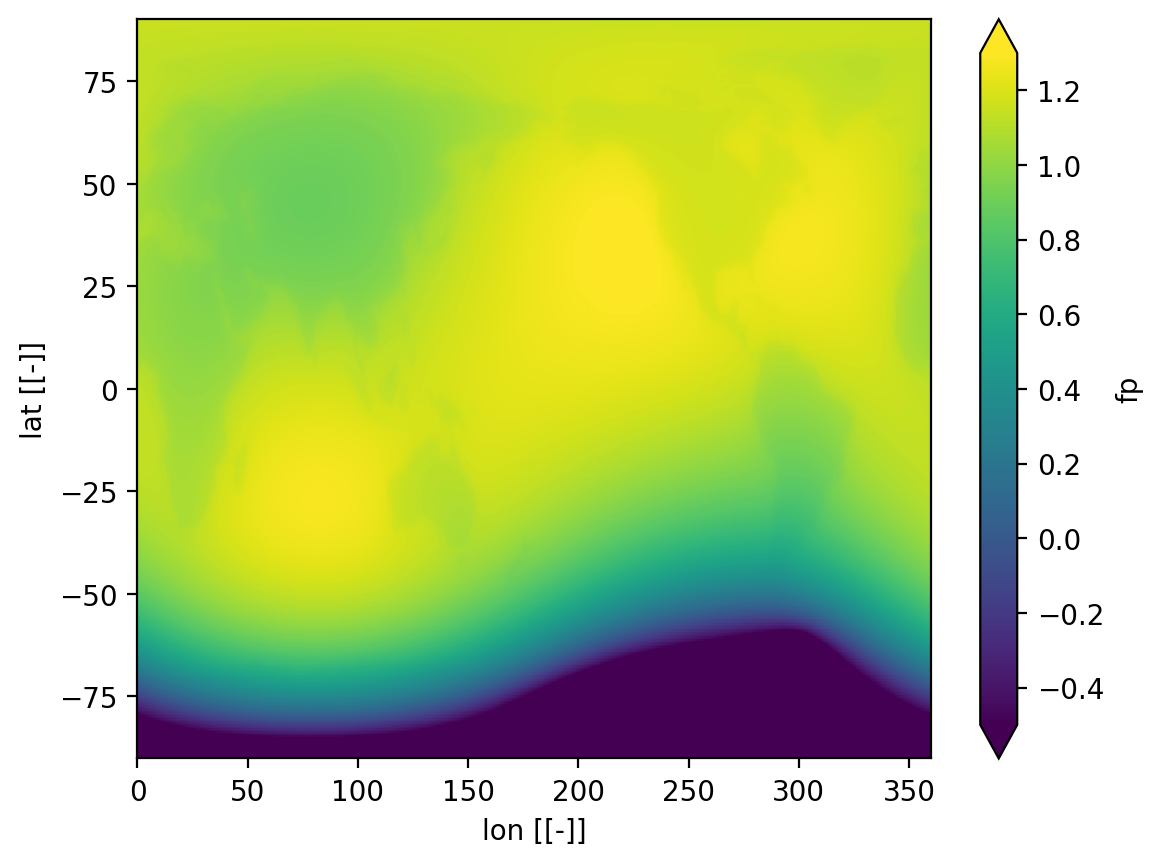

In [46]:
f_ar6_wais.fp.plot(vmin=-0.5, vmax=1.3)

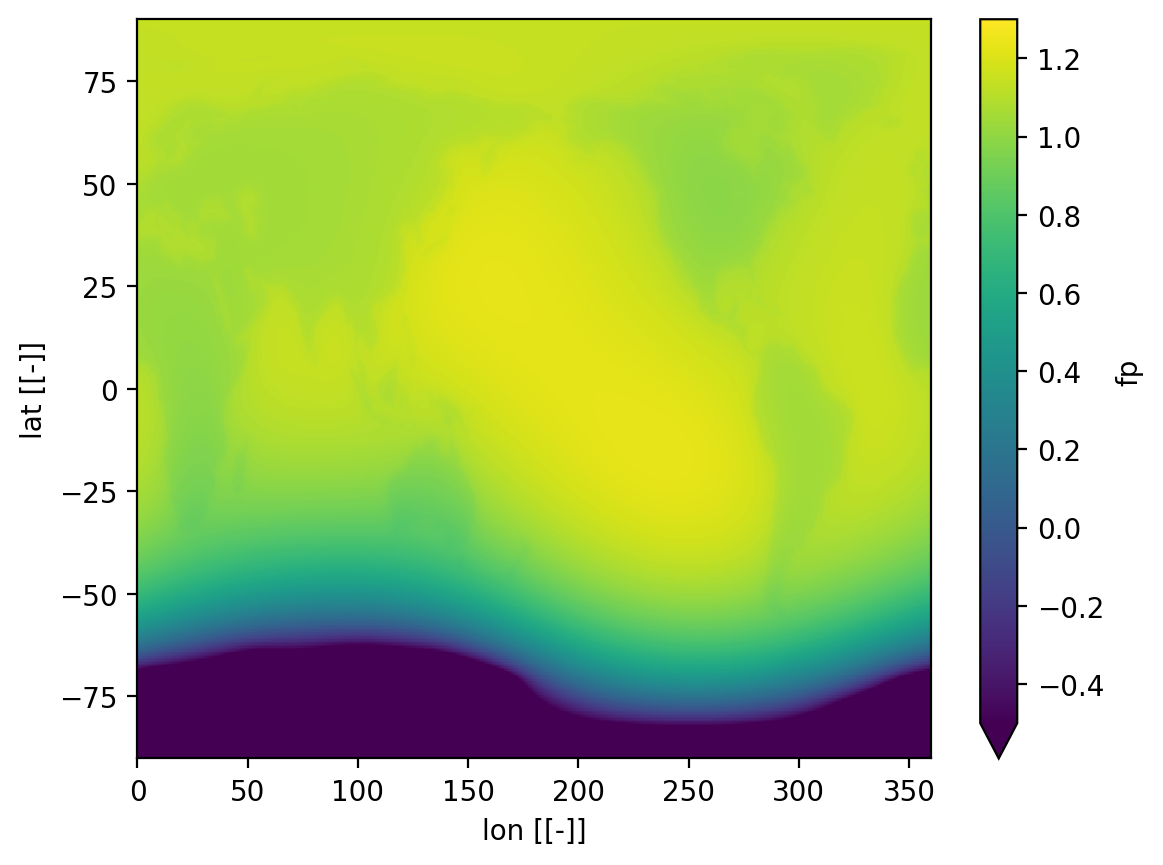

In [47]:
f_ar6_eais.fp.plot(vmin=-0.5, vmax=1.3)

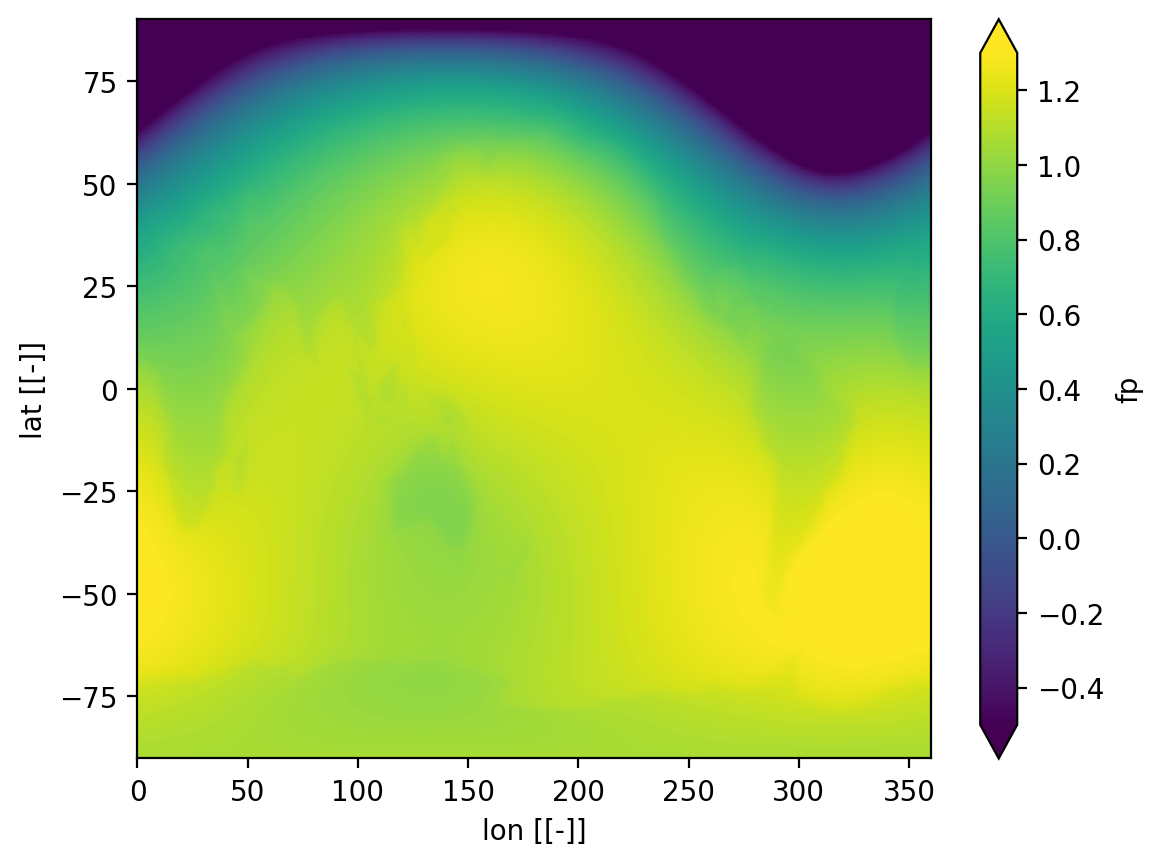

In [52]:
f_ar6_gis.fp.plot(vmin=-0.5, vmax=1.3)

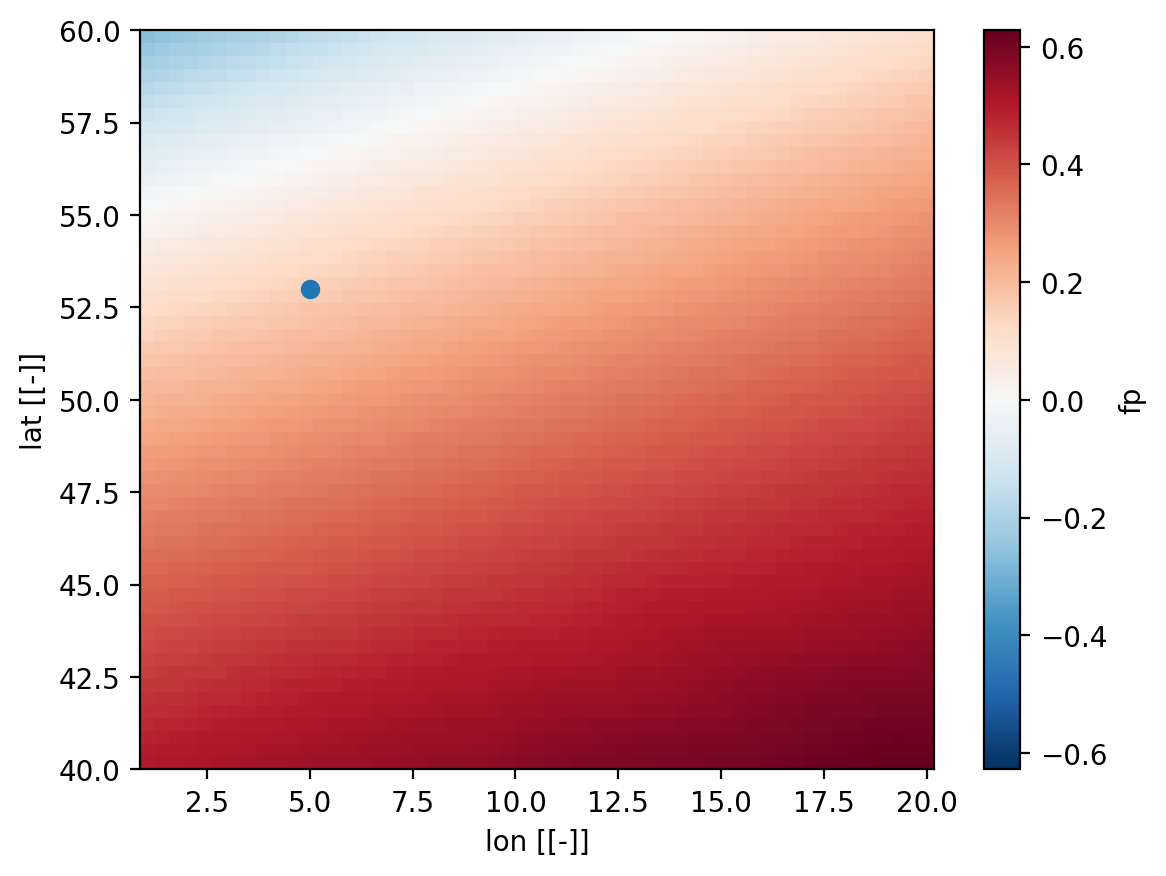

In [65]:
f_ar6_gis.fp.sel(lat=slice(60, 40), lon=slice(1, 20)).plot()
plt.scatter(LOC_FP[1],LOC_FP[0])

In [57]:
f_ar6_gis.fp.sel(lat=slice(60, 40))

<xarray.DataArray 'fp' (lat: 57, lon: 1026)>
array([[-0.2843051 , -0.27526176, -0.26746264, ..., -0.310202  ,
        -0.3019616 , -0.29353908],
       [-0.26241225, -0.25450307, -0.24679524, ..., -0.2874685 ,
        -0.2796761 , -0.27110308],
       [-0.23926614, -0.23175283, -0.22373395, ..., -0.26506296,
        -0.2563707 , -0.24736083],
       ...,
       [ 0.4717996 ,  0.4755757 ,  0.48013654, ...,  0.46322417,
         0.46559674,  0.4684831 ],
       [ 0.4813206 ,  0.48496854,  0.489255  , ...,  0.47154415,
         0.4747043 ,  0.47810662],
       [ 0.49030182,  0.49557874,  0.5002112 , ...,  0.48042598,
         0.48341033,  0.48625538]], dtype=float32)
Coordinates:
  * lat      (lat) float32 59.82 59.47 59.12 58.77 ... 41.23 40.88 40.53 40.18
  * lon      (lon) float32 0.0 0.3509 0.7018 1.053 ... 358.6 358.9 359.3 359.6